In [2]:
%load_ext zipline
import pandas as pd
from collections import OrderedDict
import pytz
import pickle
from zipline.api import order, record, symbol, set_benchmark
import zipline
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [3]:
data= OrderedDict()
s= input()
with open('sp500tickers.pickle','rb') as f:
    tickers= pickle.load(f)
for ticker in tickers:
    data[s]= pd.read_csv('stock_dfs/{}.csv'.format(s),index_col=1,parse_dates=['begins_at'])
data[s]= data[s][['open_price','high_price','low_price','close_price']]
print(s)
print(data[s].head())

Amzn


FileNotFoundError: [Errno 2] No such file or directory: 'sp500tickers.pickle'

In [4]:
def initialize(context):
    set_benchmark(symbol(s))


def handle_data(context, data):
    order(symbol(s), 10)
    record(sn=data.current(symbol(s), 'price'))
   
    

perf = zipline.run_algorithm(start=datetime(2017, 1, 1, 0, 0, 0, 0, pytz.utc),
                      end=datetime(2018, 1, 1, 0, 0, 0, 0, pytz.utc),
                      initialize=initialize,
                      capital_base=100000,
                      handle_data=handle_data
                      )


#perf.head()
perf.portfolio_value

2017-01-03 21:00:00+00:00    100000.000000
2017-01-04 21:00:00+00:00     99996.204100
2017-01-05 21:00:00+00:00    100224.991850
2017-01-06 21:00:00+00:00    100531.801900
2017-01-09 21:00:00+00:00    100555.707300
2017-01-10 21:00:00+00:00    100510.917800
2017-01-11 21:00:00+00:00    100662.912700
2017-01-12 21:00:00+00:00    101536.034500
2017-01-13 21:00:00+00:00    101776.938800
2017-01-17 21:00:00+00:00    101179.280200
2017-01-18 21:00:00+00:00    100973.632800
2017-01-19 21:00:00+00:00    101125.577600
2017-01-20 21:00:00+00:00    101043.425950
2017-01-23 21:00:00+00:00    102185.326550
2017-01-24 21:00:00+00:00    102774.004350
2017-01-25 21:00:00+00:00    104741.011750
2017-01-26 21:00:00+00:00    105131.306000
2017-01-27 21:00:00+00:00    104586.317150
2017-01-30 21:00:00+00:00    103665.855250
2017-01-31 21:00:00+00:00    102419.727850
2017-02-01 21:00:00+00:00    104100.856100
2017-02-02 21:00:00+00:00    105616.646350
2017-02-03 21:00:00+00:00     99365.085350
2017-02-06 

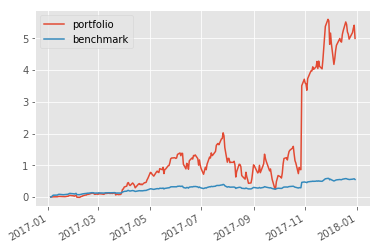

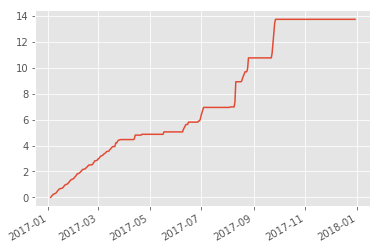

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style


style.use("ggplot")

perf.portfolio_value.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='portfolio')
perf.sn.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='benchmark')
plt.legend(loc=2)

plt.show()

perf.max_leverage.plot()
plt.show()